## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
# Start solution here
import pandas as pd

filename = "bank-full.csv"
data = pd.read_csv(filename, sep=';')
print(data)
data.columns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
data.shape
print(data)

       age           job   marital  education  ... pdays  previous poutcome    y
0       58    management   married   tertiary  ...    -1         0  unknown   no
1       44    technician    single  secondary  ...    -1         0  unknown   no
2       33  entrepreneur   married  secondary  ...    -1         0  unknown   no
3       47   blue-collar   married    unknown  ...    -1         0  unknown   no
4       33       unknown    single    unknown  ...    -1         0  unknown   no
...    ...           ...       ...        ...  ...   ...       ...      ...  ...
45206   51    technician   married   tertiary  ...    -1         0  unknown  yes
45207   71       retired  divorced    primary  ...    -1         0  unknown  yes
45208   72       retired   married  secondary  ...   184         3  success  yes
45209   57   blue-collar   married  secondary  ...    -1         0  unknown   no
45210   37  entrepreneur   married  secondary  ...   188        11    other   no

[45211 rows x 17 columns]
 

In [ ]:
data2 = data.drop(columns=['age','balance','day','month','duration','campaign','pdays','previous'])
data2.head()

,job,marital,education,default,housing,loan,contact,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,unknown,no
1,technician,single,secondary,no,yes,no,unknown,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,unknown,no
4,unknown,single,unknown,no,no,no,unknown,unknown,no


In [ ]:
data2.shape

(45211, 9)

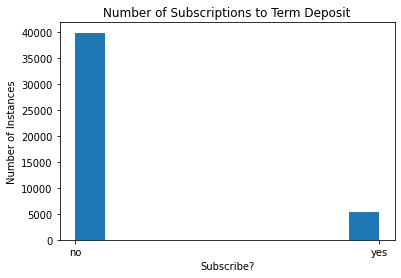

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['y'])
plt.xlabel('Subscribe?')
plt.ylabel('Number of Instances')
plt.title('Number of Subscriptions to Term Deposit')
plt.show()

In [ ]:
data2.describe()

,job,marital,education,default,housing,loan,contact,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,36959,39922


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

data3 = pd.get_dummies(data2, columns=['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'])
print(data3)
X = data3.iloc[:, 1:]
y = data3.iloc[:, 0]


         y  job_admin.  ...  poutcome_success  poutcome_unknown
0       no           0  ...                 0                 1
1       no           0  ...                 0                 1
2       no           0  ...                 0                 1
3       no           0  ...                 0                 1
4       no           0  ...                 0                 1
...    ...         ...  ...               ...               ...
45206  yes           0  ...                 0                 1
45207  yes           0  ...                 0                 1
45208  yes           0  ...                 1                 0
45209   no           0  ...                 0                 1
45210   no           0  ...                 0                 0

[45211 rows x 33 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred2 = dt.predict(X_train)
print('Accuracy =', metrics.accuracy_score(y_train, y_pred2))

Accuracy = 0.898821373273928


[[11802   175]
 [ 1319   268]]


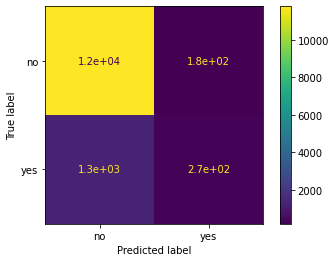

In [ ]:
from sklearn.metrics import plot_confusion_matrix

y_pred = dt.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

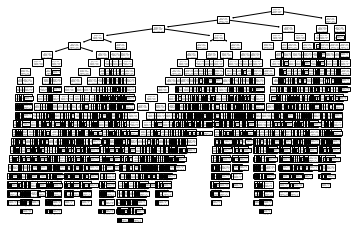

In [ ]:
from sklearn import tree

plt.figure(2)
bankTree = tree.plot_tree(dt)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(n_estimators = 10,random_state = 50)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print('Accuracy = ', acc_bagging)

Accuracy =  0.8885284576820996


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=50)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, predict_rf)

print('Accuracy = ', acc_rf)

Accuracy =  0.8906664700678266


In [ ]:
imp=pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
imp=pd.DataFrame.sort_values(imp,by=1,axis=0,ascending=False)
imp=imp.iloc[0:3,:]
print(imp)

                   0         1
30  poutcome_success  0.282314
31  poutcome_unknown  0.064034
27   contact_unknown  0.041316


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# base_est = DecisionTreeClassifier (max_depth =4)
ada_boost = AdaBoostClassifier(dt, n_estimators=200, random_state=50, learning_rate=.05)
ada_boost.fit(X_train, y_train)
predict_boost = ada_boost.predict(X_test)
acc_boost = accuracy_score(y_test, predict_rf)

print('Accuracy = ', acc_rf)

Accuracy =  0.8906664700678266


In [ ]:
imp=pd.DataFrame(zip(X_train.columns, ada_boost.feature_importances_))
imp=pd.DataFrame.sort_values(imp,by=1,axis=0,ascending=False)
imp=imp.iloc[0:3,:]
print(imp)

                   0         1
30  poutcome_success  0.184716
27   contact_unknown  0.091443
21        housing_no  0.022614


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:578: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()
